#  <font color=maroon> Male Family Planning Analysis </font> #

#### <font color=indigo>Sophia Atik, Applied Data Science, Spring 2019</font> ####

The dataset I will be using is from the 2015 to 2017 National Survey of Family Growth from the CDC, specifically their Male Questionnaire data. [__[1](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015_2017_UserGuide_MainText.pdf)__ __[2](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015-2017_MaleCAPIlite_forPUF.pdf)__ __[3](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG/)__] The data contains demographic information about the men participating, along with when and where they learned about birth control, if they got a vasectomy and where they had the procedure, how many sexual partners do they have, what is their relationship with said partners, what form of birth control do they use, what form of birth control do their partners use, etc. This dataset also contains information about the family and children living in these men’s lives.  [__[1](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015_2017_UserGuide_MainText.pdf)__ __[2](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015-2017_MaleCAPIlite_forPUF.pdf)__ __[3](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG/)__] However, I am most interested in the use of birth control by men with their partners. 

Men only have two options when it comes to birth control: condoms and vasectomies. I am looking at this dataset to get a better understanding of what men in relationships chose to use as a form of birth control. What is great about this survey is that it also asks about the birth control that their partner is using, suggesting that men might just rely on their female partners for contraceptive methods.[__[2](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015-2017_MaleCAPIlite_forPUF.pdf)__] I am also hoping this dataset will inform me on the situations when men are most likely to get a vasectomy (ie. what is the family dynamic at that time, what is the relationship status, how many children does he have, etc.). 

In order to best complete my analysis, I will be using the answers from the 2015 to 2017 National Survey of Family Growth Male Questionnaire that best paint the best picture of where this man is in life and see if there are any trends to indicate why he chose to get a vasectomy. 



-------------

## <font color=Magenta>Importing My Dataset</font> ###

I was finally able to upload my data by first downloading it into Strata. However, the school’s computer lab version of Stata can only load datasets with number of variables less than 2,040. The original dataset has 2,945 variables. I had to manually chop down the data by deleting columns that I knew I would not need to do my analysis. Below is the uploaded clipped raw data from the 2015-2017 Male Data file.

In [101]:
import pandas as pd    
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [102]:
df = pd.read_stata('Raw_Data_Clipped.dta')
df.head()

,CASEID,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,AGESCRN,HISP,HISPGRP,ROSCNT,...,PUBASSIS_I,WGT2015_2017,SECU,SEST,CMINTVW,CMLSTYR,CMFIVYR,QUARTER,PHASE,INTVWYEAR
0,70622,29 years,No,3,29 years,29 years,29 years,No,NaN,3 HOUSEHOLD MEMBERS,...,QUESTIONNAIRE DATA (NOT IMPUTED),11801.703471,1,366,1399,1387,1333,20,1,2016
1,70626,18 years,Yes,Black or African American,18 years,18 years,18 years,Yes,"Mexican, Mexican American, or Chicano, only",6 HOUSEHOLD MEMBERS,...,QUESTIONNAIRE DATA (NOT IMPUTED),5153.910962,1,309,1391,1379,1321,17,1,2015
2,70629,23 years,No,3,23 years,23 years,23 years,No,NaN,3 HOUSEHOLD MEMBERS,...,QUESTIONNAIRE DATA (NOT IMPUTED),10293.100099,4,351,1405,1393,1345,22,1,2017
3,70631,17 years,No,3,17 years,17 years,17 years,No,NaN,4 HOUSEHOLD MEMBERS,...,QUESTIONNAIRE DATA (NOT IMPUTED),14236.029179,1,364,1403,1391,1333,21,1,2016
4,70636,37 years,No,3,37 years,37 years,37 years,No,NaN,2 HOUSEHOLD MEMBERS,...,QUESTIONNAIRE DATA (NOT IMPUTED),11320.650257,4,343,1393,1381,1333,18,1,2016


-------------

## <font color=Magenta>Cleaning My Data</font> ###

The first thing I do is look through the list of variables collected __[from this document](https://www.cdc.gov/nchs/data/nsfg/NSFG_2015-2017_UG_App1c_FileIndex_Male.pdf)__ and select those specific columns that I would need for my analysis. 

Next, I cleaned my data. In order to be able to some analysis, I had to make sure some important variables were recorded as numbers. Below is the code I used to eliminate words in the variables or trim down the variables to an appropriate length of words. You may also find some basic analysis in this section. I did this to check my work as I went along.

In [103]:
#KMM the Data Assistant helped me figure this out. 
df["RSCRAGE"].head()
#Main issue - running the above reported strings with years

df2 = df 
#Solution - re-run code
df2['RSCRAGE'] = df2['RSCRAGE'].str.replace('years','')

#import pandas as pd 
df2["RSCRAGE"] = pd.to_numeric(df2["RSCRAGE"])

In [119]:
# Here I run basic stats on the age of the men in the interviews.
df_everoper.RSCRAGE.describe()

count    4536.000000
mean       30.404762
std        10.135084
min        15.000000
25%        21.000000
50%        30.000000
75%        39.000000
max        49.000000
Name: RSCRAGE, dtype: float64

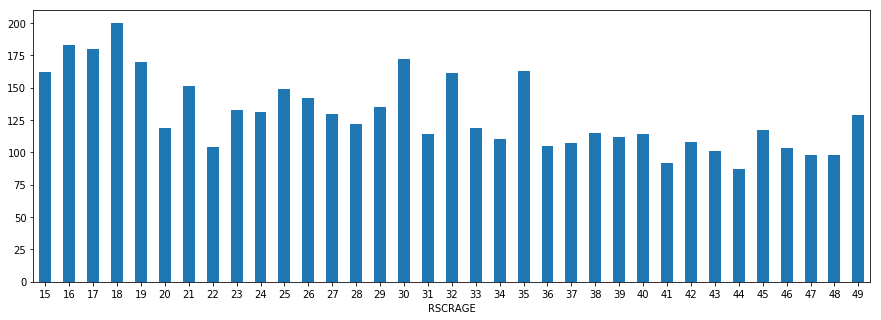

In [120]:
# Showing a basic distribution of the age of men interviews using a histogram.
df_everoper.groupby('RSCRAGE')['RSCRAGE'].count().plot.bar(rot=0, figsize=(15,5))

In [104]:
# I do not care about what the 'yearly salaries' equal in 'weekly' and 'monthly'. I want the variable to only be recorded as 'yearly'.
def extract(slry):
    if(slry == "Don't know" or slry == "Refused" or slry == "Not ascertained"):
        res = slry
    else:
        res = slry.split('/')[2]
    return res                       

In [105]:
df2['Salary_Range']= df2['TOTINC'].apply(extract)

In [106]:
df2['Salary_Range'].head()

0    $50,000-59,999 (yearly)
1    $20,000-24,999 (yearly)
2                 Don't know
3    $75,000-99,999 (yearly)
4    $60,000-74,999 (yearly)
Name: Salary_Range, dtype: category
Categories (18, object): [Under $5,000 (yearly) < $5,000-7,499 (yearly) < $7,500-9,999 (yearly) < $10,000-12,499 (yearly) ... $100,000 or more (yearly) < Not ascertained < Refused < Don't know]

In [107]:
# I need the number of children to be recorded as scalar numbers in order to complete my analysis.
df2['NUMKDHH'].value_counts()

NO CHILDREN           3229
2 CHILDREN             516
1 CHILD                516
3 CHILDREN             198
4 CHILDREN OR MORE      81
Name: NUMKDHH, dtype: int64

In [170]:
def extract2(numkids):
    if(numkids == "NO CHILDREN"):
        res = 0
    else:
        res = numkids.split(' ')[0]
    return res

In [171]:
df2['Number_Kids']= df2['NUMKDHH'].apply(extract2)

In [172]:
df2['Number_Kids'].value_counts()

0    3229
2     516
1     516
3     198
4      81
Name: Number_Kids, dtype: int64

In [173]:
df2["Number_Kids"] = pd.to_numeric(df2["Number_Kids"])

In [174]:
#Basic stats on the number of kids.
df2['Number_Kids'].describe()

count    4540.000000
mean        0.543172
std         0.975412
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: Number_Kids, dtype: float64

_____

Because I am most curious about men who have gotten a vasectomy, I needed to seperate those who have and those who have not had the operation. Below I remove people who refused to answer the question or did not know the answer to the question. I then turned the variable from an object to a boolean variable for an easier analysis.

_____

In [113]:
mask_refused = df2['EVEROPER'] == 'Refused'
mask_dont = df2['EVEROPER'] == 'Don\'t know'
# mask_remainder2 = (df2['EVEROPER'] != 'Don\'t know') & (df2['EVEROPER'] != 'Refused')
mask_remainder = ~mask_refused & ~mask_dont

In [114]:
len(df2), len(df2[mask_dont]), len(df2[mask_refused]), len(df2[mask_remainder])

(4540, 1, 3, 4536)

In [115]:
df_everoper=df2[mask_remainder]
df_everoper.head()

,CASEID,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,AGESCRN,HISP,HISPGRP,ROSCNT,...,SECU,SEST,CMINTVW,CMLSTYR,CMFIVYR,QUARTER,PHASE,INTVWYEAR,Salary_Range,Number_Kids
0,70622,29,No,3,29 years,29 years,29 years,No,NaN,3 HOUSEHOLD MEMBERS,...,1,366,1399,1387,1333,20,1,2016,"$50,000-59,999 (yearly)",1
1,70626,18,Yes,Black or African American,18 years,18 years,18 years,Yes,"Mexican, Mexican American, or Chicano, only",6 HOUSEHOLD MEMBERS,...,1,309,1391,1379,1321,17,1,2015,"$20,000-24,999 (yearly)",0
2,70629,23,No,3,23 years,23 years,23 years,No,NaN,3 HOUSEHOLD MEMBERS,...,4,351,1405,1393,1345,22,1,2017,Don't know,0
3,70631,17,No,3,17 years,17 years,17 years,No,NaN,4 HOUSEHOLD MEMBERS,...,1,364,1403,1391,1333,21,1,2016,"$75,000-99,999 (yearly)",0
4,70636,37,No,3,37 years,37 years,37 years,No,NaN,2 HOUSEHOLD MEMBERS,...,4,343,1393,1381,1333,18,1,2016,"$60,000-74,999 (yearly)",0


In [116]:
df_everoper.EVEROPER.replace(('Yes', 'No'), (1, 0), inplace=True)

In [117]:
#The final count of men who either got or did not get a vasectomy.
df_everoper.EVEROPER.value_counts()

0    4331
1     205
Name: EVEROPER, dtype: int64

In [118]:
#This is the count of men who recorded getting a vasectomy reversal.
df_everoper.RVRSVAS.value_counts()

No    200
Name: RVRSVAS, dtype: int64

In [ ]:
# I know that 205 men got a vasectomy adn that 200 did NOT get a reversal. 
# I can not assume that 5 men did get a reversal. If they did get a reversal, they would have answered 'Yes'.

_____

I am most interested in doing my analysis on men that have previously had a vasectomy procedure. These men are already involved in family planning, are already taking contraceptive control, and would be the men most likely to use a male birth control option in the future. Therefore, I isolate the men who said "yes" to have previously had a sterilization operation from the rest of the dataset.

_____

In [121]:
# Creating a data frame for only the men that had a vasectomy.
df_vasoper = df_everoper[df_everoper['EVEROPER'] == 1]

In [122]:
len(df_vasoper)

205

In [123]:
df_vasoper.head()

,CASEID,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,AGESCRN,HISP,HISPGRP,ROSCNT,...,SECU,SEST,CMINTVW,CMLSTYR,CMFIVYR,QUARTER,PHASE,INTVWYEAR,Salary_Range,Number_Kids
81,70799,33,No,3,33 years,33 years,33 years,No,NaN,2 HOUSEHOLD MEMBERS,...,3,329,1398,1386,1333,19,2,2016,"$50,000-59,999 (yearly)",1
108,70858,46,No,3,46 years,46 years,46 years,No,NaN,2 HOUSEHOLD MEMBERS,...,3,309,1396,1384,1333,19,1,2016,"$100,000 or more (yearly)",0
116,70878,41,No,3,41 years,41 years,41 years,No,NaN,1 HOUSEHOLD MEMBER,...,2,367,1408,1396,1345,23,1,2017,"$100,000 or more (yearly)",0
124,70908,48,No,3,48 years,48 years,48 years,No,NaN,3 HOUSEHOLD MEMBERS,...,4,312,1389,1377,1321,17,1,2015,"$60,000-74,999 (yearly)",2
166,71006,48,No,3,48 years,48 years,48 years,No,NaN,5 HOUSEHOLD MEMBERS,...,1,351,1392,1380,1321,17,2,2015,"$100,000 or more (yearly)",2


In [131]:
# Here is my attempt to get rid of the one man who said he did not know what year he had a vasectomy. If this had worked, it would have really helped my analysis.
df_vasoper[df_vasoper['VASEC_Y'] != 'Don\'t know']
df_vasoper['VASEC_Y'].value_counts()

2012.0        23
2015.0        22
2014.0        17
2013.0        13
2007.0        11
2005.0        11
2011.0        11
2010.0        11
2009.0        10
2008.0        10
2006.0         9
2003.0         8
2016.0         8
2004.0         6
1996.0         6
2000.0         5
2002.0         4
2001.0         3
1992.0         2
2017.0         2
1998.0         2
1997.0         2
1988.0         1
1990.0         1
1991.0         1
Don't know     1
1993.0         1
1994.0         1
1999.0         1
1985.0         1
Name: VASEC_Y, dtype: int64

-------------

## <font color=Magenta>Main Analysis<font> ###

Below is my main analysis portion of my project. There are few data visualtions that paint the picture of the men who elect to get a vasectomy. Because this is my first time coding and doing such analysis, I do realize that there is the potential to do much more witht this. What I have done are beginner steps towards unlocking knowledge that could be extremely useful for someone trying to find men interested in a new form of male birth control.

### <font color=Blue>Age<font> ###

The first figure plots the age of men interviewed who had a vasectomy against the age they were when they had their first child. The two factors appear positively correlated. The older a man is when he has his first child, the more likely he is to get a vasectomy.

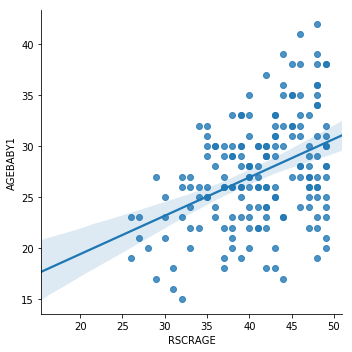

In [178]:
# of just men who have had a vasectomy
import seaborn as sns
sns.lmplot(x='RSCRAGE',y='AGEBABY1',data=df_vasoper,fit_reg=True)

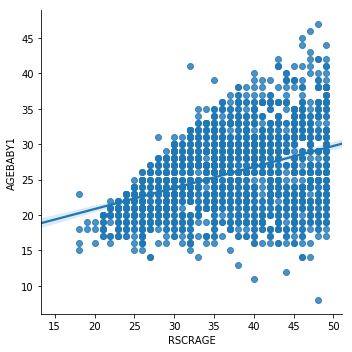

In [179]:
# of all the men
import seaborn as sns
sns.lmplot(x='RSCRAGE',y='AGEBABY1',data=df_everoper,fit_reg=True)

Men are most likely to get a vasectomy between the ages of 40 and 50.

In [183]:
df_vasoper['RSCRAGE'].describe()

count    205.000000
mean      40.736585
std        6.128436
min       17.000000
25%       37.000000
50%       41.000000
75%       46.000000
max       49.000000
Name: RSCRAGE, dtype: float64

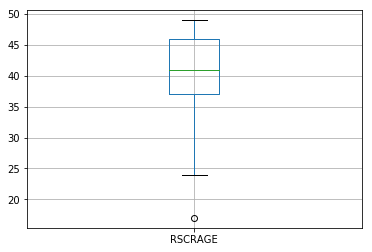

In [219]:
boxplot = df_vasoper.boxplot(column=['RSCRAGE'])

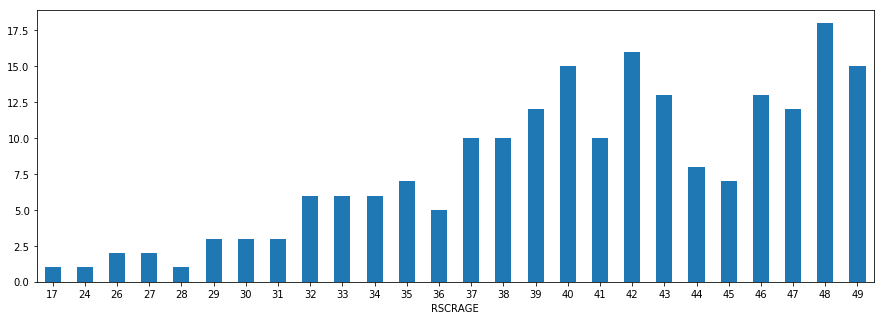

In [213]:
df_vasoper.groupby('RSCRAGE')['RSCRAGE'].count().plot.bar(rot=0, figsize=(15,5))

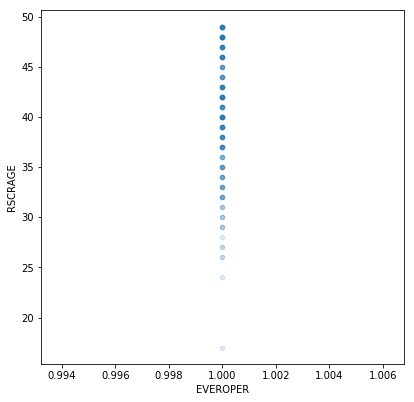

In [182]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_vasoper.plot.scatter('EVEROPER', 'RSCRAGE', alpha=0.15,ax=ax)

### <font color=Blue>Number of Children<font> ###

Most men who had a vasectomy had it after about two children.

In [181]:
df_vasoper['Number_Kids'].describe()

count    205.000000
mean       1.439024
std        1.221715
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Number_Kids, dtype: float64

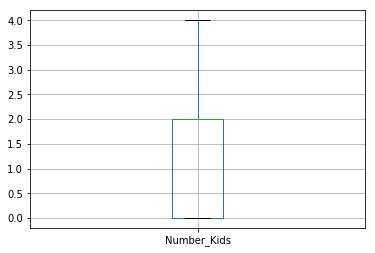

In [220]:
boxplot = df_vasoper.boxplot(column=['Number_Kids'])

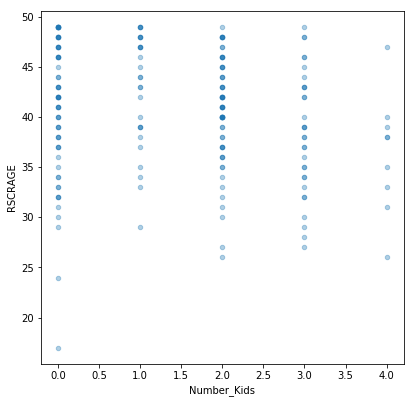

In [180]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_vasoper.plot.scatter('Number_Kids', 'RSCRAGE', alpha=0.35,ax=ax)

### <font color=Blue>Salaries<font> ###

Men who elect to get a vasectomy are more likely to make more money. According to this survey, most men who had a vasectomy made over $100,000 per year. This makes sense because vasectomies are not covered by government based insurance and are covered by very few privately based insurances.

In [184]:
df_vasoper['Salary_Range'].value_counts()

$100,000 or more (yearly)    87
$75,000-99,999 (yearly)      33
$60,000-74,999 (yearly)      20
$40,000-49,999 (yearly)      14
$50,000-59,999 (yearly)      13
$30,000-34,999 (yearly)       6
$15,000-19,999 (yearly)       6
$25,000-29,999 (yearly)       4
$10,000-12,499 (yearly)       4
Don't know                    4
Refused                       4
$35,000-39,999 (yearly)       4
$20,000-24,999 (yearly)       3
$7,500-9,999 (yearly)         2
Under $5,000 (yearly)         1
$12,500-14,999 (yearly)       0
Not ascertained               0
$5,000-7,499 (yearly)         0
Name: Salary_Range, dtype: int64

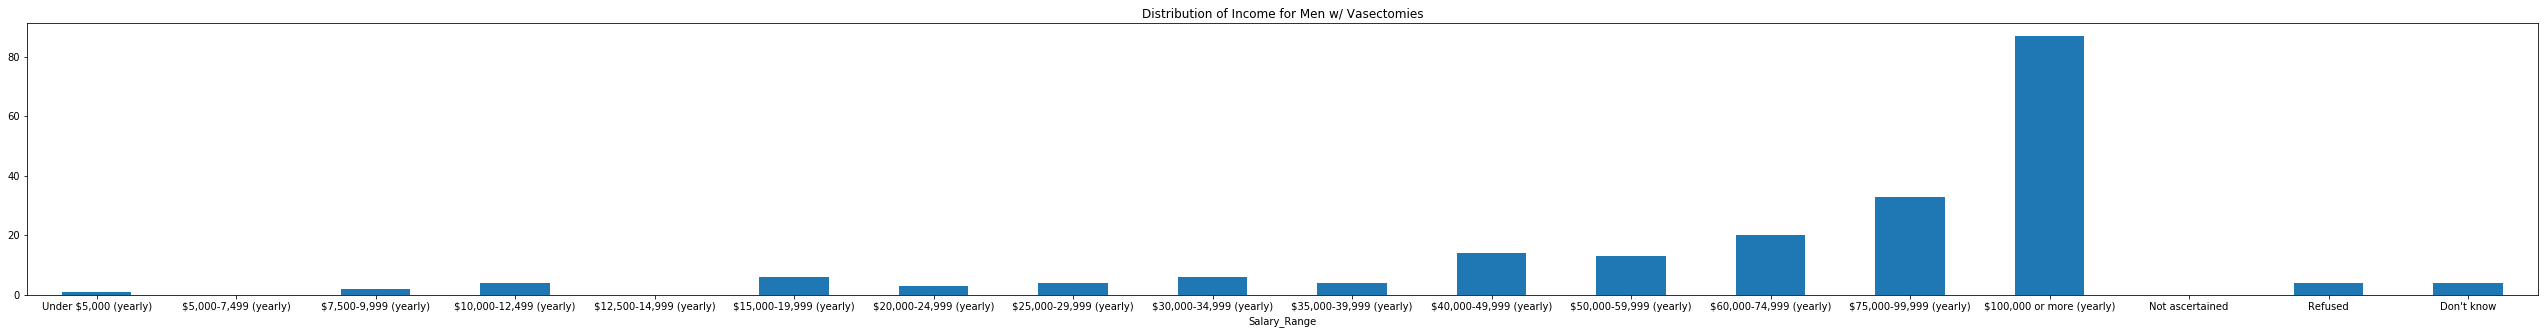

In [217]:
df_vasoper.groupby('Salary_Range')['Salary_Range'].count().plot.bar(rot=0, figsize=(45,5), title= ('Distribution of Income for Men w/ Vasectomies') )

### <font color=Blue>Religion<font> ###

Majority of men who get vasectomies are not religious. 

In [185]:
df_vasoper['RELCURR'].value_counts()

None                                            70
Baptist/Southern Baptist                        34
Protestant - No specific denomination           29
Methodist, Lutheran, Presbyterian, Episcopal    24
Catholic                                        23
Other religion                                  12
Other Protestant denomination                    7
Fundamentalist Protestant                        6
Don't know                                       0
Refused                                          0
Name: RELCURR, dtype: int64

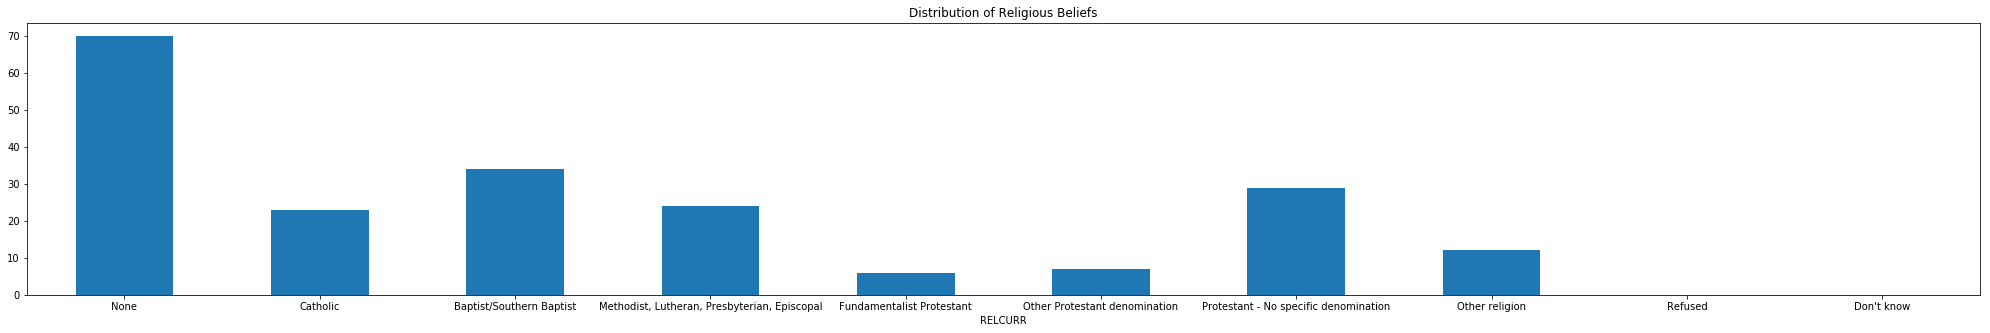

In [218]:
df_vasoper.groupby('RELCURR')['RELCURR'].count().plot.bar(rot=0, figsize=(35,5), title= ('Distribution of Religious Beliefs') )

### <font color=Blue>Yearly Trends<font> ###

The majority of the men who were interviewed had their operation semi-recently. Most the vasectomies occured between 2005 and 2015. This could be because more of the men interviewed were of the right age. Or, it could be because vaectomies have become a more accepted and popular procedure.

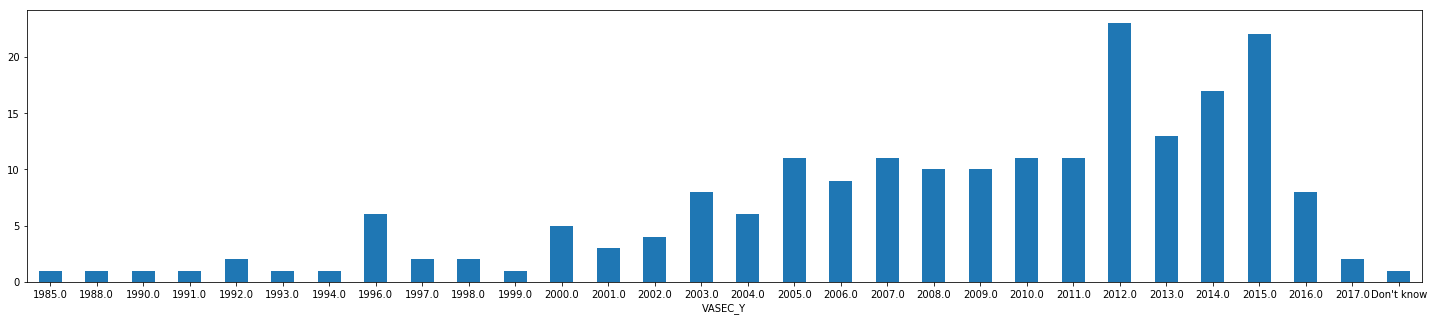

In [135]:
df_vasoper.groupby('VASEC_Y')['VASEC_Y'].count().plot.bar(rot=0, figsize=(25,5))

-------------

## <font color=Magenta>Merging Datasets<font> ###

I decided to merge the 2015-2017 Male Data with Census data __[from this website](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk)__. This Census data has the number of men, ages 15-49, located in each state of the United States. My hope was to make a geographical representation to determine whether vasectomies are more prevalent in certain locations in the US.

In [136]:
import pandas as pd    
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from csv import reader, writer

In [146]:
# Age is located in a row of this dataset.
df_states = pd.read_csv('US_2015_SEX.csv')
df_states = df_states
df_states.head()

,GEO.id,GEO.id2,GEO.display-label,est72015sex1_TotalMales,est72015sex1_age15,est72015sex1_age16,est72015sex1_age17,est72015sex1_age18,est72015sex1_age19,est72015sex1_age20,...,est72015sex1_age40,est72015sex1_age41,est72015sex1_age42,est72015sex1_age43,est72015sex1_age44,est72015sex1_age45,est72015sex1_age46,est72015sex1_age47,est72015sex1_age48,est72015sex1_age49
0,Id,Id2,Geography,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Ma...
1,NaN,NaN,NaN,NaN,15,16,17,18,19,20,...,40,41,42,43,44,45,46,47,48,49
2,0400000US01,1,Alabama,2353184,33614,32465,32786,31939,31410,32541,...,28710,28448,28560,30501,32343,31811,30009,29305,29256,30361
3,0400000US02,2,Alaska,389025,5364,5117,4960,4856,5299,6415,...,4668,4352,4357,4490,4655,4912,4603,4441,4511,4554
4,0400000US04,4,Arizona,3391490,47484,46374,46599,47761,47973,48502,...,42700,40707,40687,41820,43886,44638,41875,40564,39514,39802


In [152]:
# I had to transpose the Census data in order to have age in a column.
df_states = pd.read_csv('US_2015_St.csv', skiprows=1)
df_states = df_states.T
# I also had to label all of the columns by hand.
df_states.columns= ['AGE', 'Alabama','Alaska', 'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'District of Columbia',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']
df_states.head()

,AGE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Geography,0,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Population Estimate (as of July 1) - 2015 - Male; Total - 15,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,5811,44395,206049,25549,3856,54560,46211,11361,39131,3874
Population Estimate (as of July 1) - 2015 - Male; Total - 16,16,32465,5117,46374,20296,262187,35139,24768,5859,2510,...,5862,44048,200617,24552,3845,53641,45972,11072,38483,3789
Population Estimate (as of July 1) - 2015 - Male; Total - 17,17,32786,4960,46599,20479,265186,34702,24937,5945,2603,...,5560,43419,198995,24396,3970,53252,46215,11312,38256,3738
Population Estimate (as of July 1) - 2015 - Male; Total - 18,18,31939,4856,47761,19718,271217,36191,26592,6164,4061,...,5553,41739,194683,23429,4785,55485,44422,11317,38429,3585


In [155]:
# Merging of the 2015-2017 Male Data (all men) to the Census data.
df_merge = df_states.merge(df_everoper, left_on='AGE', right_on='RSCRAGE')
df_merge.head()

,AGE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,SECU,SEST,CMINTVW,CMLSTYR,CMFIVYR,QUARTER,PHASE,INTVWYEAR,Salary_Range,Number_Kids
0,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,1,330,1406,1394,1345,22,1,2017,"$5,000-7,499 (yearly)",0
1,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,2,366,1412,1400,1345,24,1,2017,"$20,000-24,999 (yearly)",0
2,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,3,329,1397,1385,1333,19,1,2016,"$75,000-99,999 (yearly)",0
3,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,3,364,1397,1385,1333,19,1,2016,"$100,000 or more (yearly)",0
4,15,33614,5364,47484,20725,265378,36134,24592,6005,2616,...,2,337,1391,1379,1321,17,1,2015,"$7,500-9,999 (yearly)",0


Here I have encountered a problem. While I have successfully merged the two datasets, I am not quite sure what to do next. Esentially what I created where a lot more men who either had or had not had a vasecomty, based on their age. But, because the states are column headers too, those numbers do not change like they should. Therefore, I can not see the distribution by states.

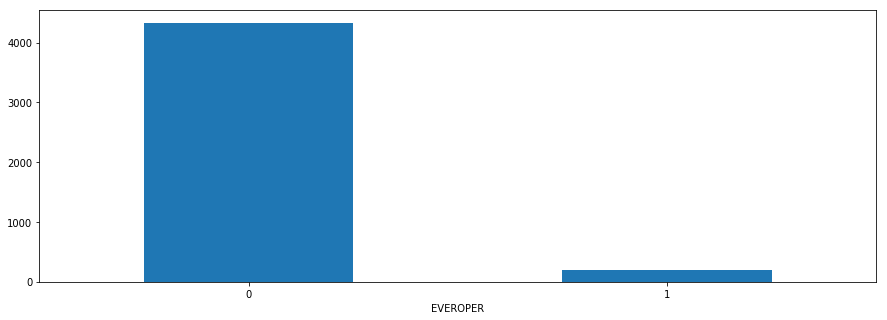

In [188]:
df_merge.groupby('EVEROPER')['EVEROPER'].count().plot.bar(rot=0, figsize=(15,5))

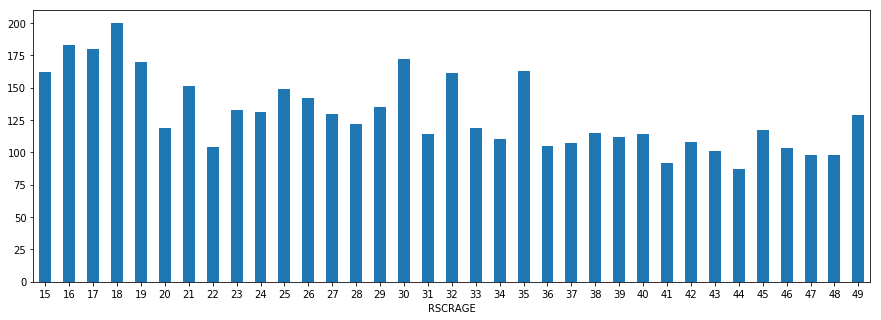

In [160]:
df_merge.groupby('RSCRAGE')['RSCRAGE'].count().plot.bar(rot=0, figsize=(15,5))

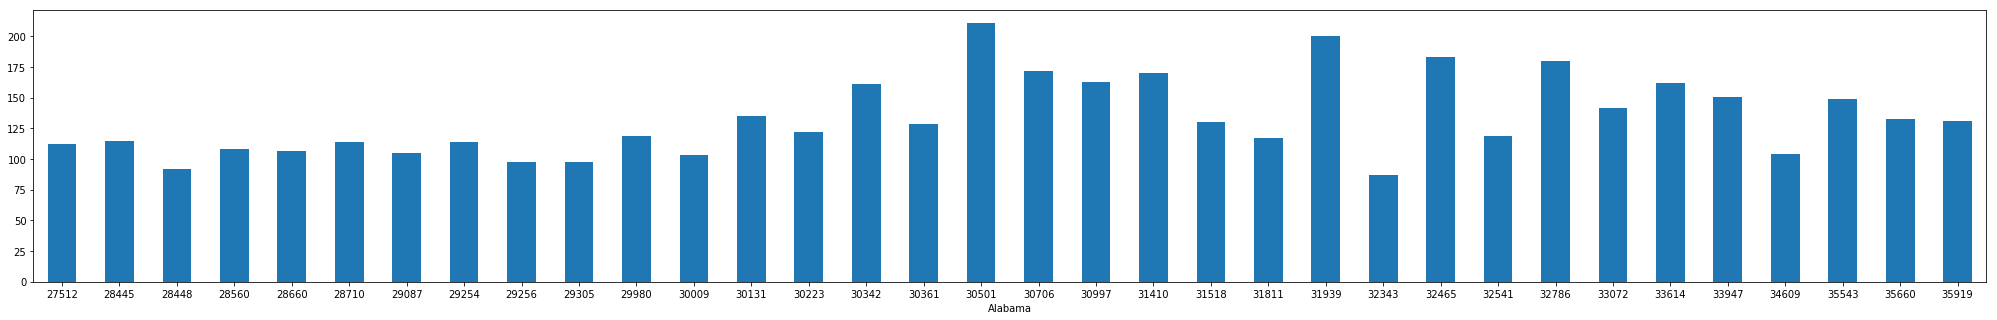

In [187]:
df_merge.groupby('Alabama')['Alabama'].count().plot.bar(rot=0, figsize=(35,5))

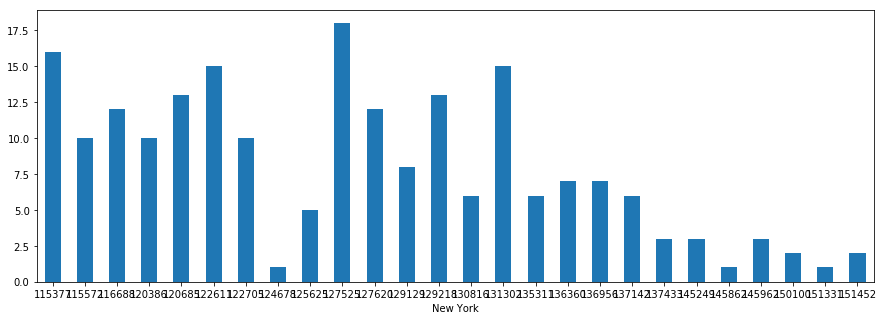

In [193]:
df_merge.groupby('New York')['New York'].count().plot.bar(rot=0, figsize=(15,5))

So I am going to try again with merging the Census data with only the men who had a vasectomy.

In [190]:
# Merging of the 2015-2017 Male Data (men with vasectomies) to the Census data.
df_mergevas = df_states.merge(df_vasoper, left_on='AGE', right_on='RSCRAGE')
df_mergevas.head()

,AGE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,SECU,SEST,CMINTVW,CMLSTYR,CMFIVYR,QUARTER,PHASE,INTVWYEAR,Salary_Range,Number_Kids
0,17,32786,4960,46599,20479,265186,34702,24937,5945,2603,...,3,330,1401,1389,1333,21,1,2016,"$20,000-24,999 (yearly)",0
1,24,35919,8125,52725,21946,323861,43542,23000,6850,6561,...,3,311,1412,1400,1345,24,1,2017,"$15,000-19,999 (yearly)",0
2,26,33072,7152,49883,20064,315190,42875,22076,7001,6904,...,1,347,1410,1398,1345,24,1,2017,"$25,000-29,999 (yearly)",4
3,26,33072,7152,49883,20064,315190,42875,22076,7001,6904,...,2,322,1407,1395,1345,22,1,2017,"$75,000-99,999 (yearly)",2
4,27,31518,7021,47625,19310,307712,42881,22477,6686,7255,...,2,311,1395,1383,1333,18,2,2016,"$75,000-99,999 (yearly)",2


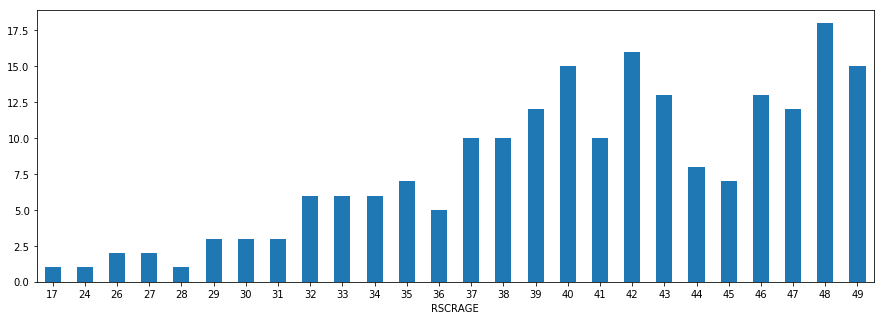

In [191]:
df_mergevas.groupby('RSCRAGE')['RSCRAGE'].count().plot.bar(rot=0, figsize=(15,5))

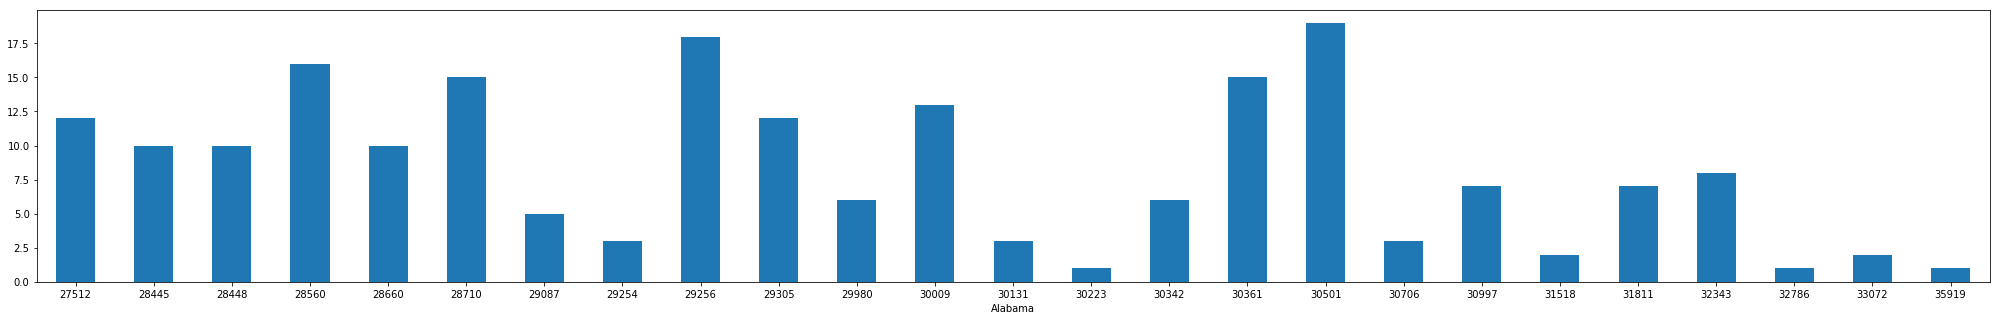

In [192]:
df_mergevas.groupby('Alabama')['Alabama'].count().plot.bar(rot=0, figsize=(35,5))

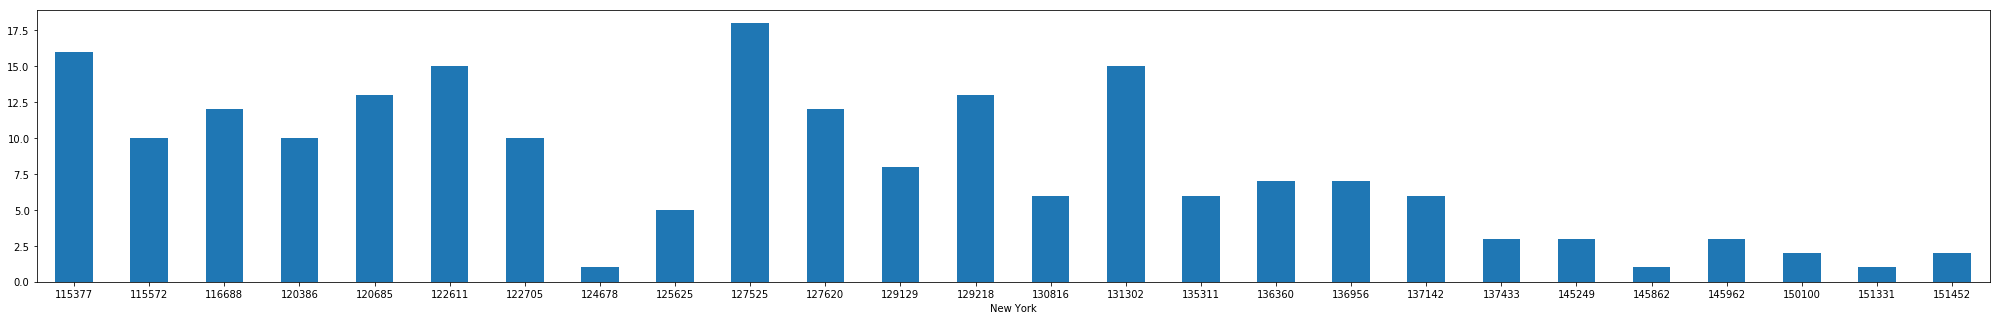

In [194]:
df_mergevas.groupby('New York')['New York'].count().plot.bar(rot=0, figsize=(35,5))

The data visuals definitely look different. With more time, I would go into greater detail about what these mean and learn how to interpret data in a more informed way. I would also love to re-merge my datasets and create geographical US heat map showing where men who get vasectomies are most likely to live.

-------------

## <font color=Magenta>Machine Learning<font> ###

Below I am trying to delop machine learning to predict whether or not a man will get a vasectomy. Based on what we learned in class and with help from __[this website](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)__, I was able to create the following basic machine learning code. 

However, I encountered a problem. The majority of the answers from the 2015-2017 Male Data were recorded as not scalar numbers. Therefore, I could not run the entire dataset (all 1951 variables) through the machine learning code. I could only run the code on the variables that recorded scalar values. That left me with 6 variables to run. In the future, I want to clean more column so that I can have more variables to run through the machine learning. The more variables, the more chance for the code to check and the more accurate the results will be. 

I am aware that the following code is extremely inaccurate. However, I have learned how to run machine learning and what next steps would be nesecary to create a more realistic model. There also might be a different typer a machine learning that I could have used for variables with non-scalar values, but I was not aware.

In [275]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [276]:
# Creating a subset of the varibles that have scalar values to be run.
df_subset=df_everoper[['RSCRAGE', 'EVEROPER', 'Number_Kids', 'VRY1STAG', 'LSEXRAGE', 'AGEBABY1']]
df_subset.head()

,RSCRAGE,EVEROPER,Number_Kids,VRY1STAG,LSEXRAGE,AGEBABY1
0,29,0,1,18.0,29.0,23.0
1,18,0,0,NaN,NaN,NaN
2,23,0,0,NaN,NaN,NaN
3,17,0,0,NaN,NaN,NaN
4,37,0,0,12.0,20.0,NaN


In [277]:
# Got rid of all NaN values so that there were only numbers present in the dataset I am working with.
df_features=df_subset.dropna()
df_features.head()

,RSCRAGE,EVEROPER,Number_Kids,VRY1STAG,LSEXRAGE,AGEBABY1
0,29,0,1,18.0,29.0,23.0
5,49,0,2,17.0,49.0,19.0
9,31,0,4,19.0,31.0,21.0
11,30,0,0,19.0,30.0,29.0
13,31,0,1,29.0,31.0,30.0


In [278]:
features = df_features
print('The shape of our features is:', features.shape)
features.head()

The shape of our features is: (1780, 6)


,RSCRAGE,EVEROPER,Number_Kids,VRY1STAG,LSEXRAGE,AGEBABY1
0,29,0,1,18.0,29.0,23.0
5,49,0,2,17.0,49.0,19.0
9,31,0,4,19.0,31.0,21.0
11,30,0,0,19.0,30.0,29.0
13,31,0,1,29.0,31.0,30.0


In [279]:
features.describe()

,RSCRAGE,EVEROPER,Number_Kids,VRY1STAG,LSEXRAGE,AGEBABY1
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,37.169663,0.101124,1.294944,16.906180,37.074157,25.938202
std,7.519163,0.301577,1.151326,3.993765,7.427605,5.859763
min,18.000000,0.000000,0.000000,4.000000,18.000000,8.000000
25%,31.000000,0.000000,0.000000,15.000000,31.000000,21.000000
50%,38.000000,0.000000,1.000000,16.000000,38.000000,25.000000
75%,43.000000,0.000000,2.000000,18.000000,43.000000,30.000000
max,49.000000,1.000000,4.000000,44.000000,50.000000,47.000000


In [280]:
# I want the machine learning to predict whether or not a man will get a vasectomy. Therefore, EVEROPER (the variable for that), can not be used.
features = pd.get_dummies(features)

In [282]:
labels = np.array(features['EVEROPER'])

In [283]:
features= features.drop('EVEROPER', axis = 1)

In [284]:
feature_list = list(features.columns)

In [287]:
# The list of variables that will be used to predict
feature_list

['RSCRAGE', 'Number_Kids', 'VRY1STAG', 'LSEXRAGE', 'AGEBABY1']

In [288]:
features = np.array(features)

In [289]:
#Creating training and testing sets for running the Random Forrest. Test set = 25% and Training set =75% of data.
train_features, test_features, train_labels, test_labels= train_test_split(features,labels, test_size = 0.25, random_state = 2)

In [290]:
len(X_train), len(X_test)

(3402, 1134)

In [291]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1335, 5)
Training Labels Shape: (1335,)
Testing Features Shape: (445, 5)
Testing Labels Shape: (445,)


In [295]:
baseline_preds = test_features[:, feature_list.index('RSCRAGE')]

baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  36.95


In [296]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

In [297]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'Received Vasectomy Opperation.')

Mean Absolute Error: 0.19 Received Vasectomy Opperation.


In [298]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


/Users/SophiaSGA/miniconda3/envs/em212/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/SophiaSGA/miniconda3/envs/em212/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


The average baseline error is 36.95%. That is pretty high. The accuracy is non-existant. While I have successfully got a machine learning code to run on my data, I know that additional work has to be done in order to create a more accurate model to predict whether or not a man will elect to get a vasectomy.

-------------

## <font color=Magenta>Overall Conclusions<font> ###

This information could be very valuable to someone who needs to know men’s attitudes toward birth control. This information would be important for someone marketing a new form of birth control to men and knowing which demographic and psychographic group of men to target. With the current contraceptive market being dominated by contraceptive methods for women, companies developing a contraceptive for men will need as much insight as possible to obtain significant market share. 

This dataset did not explore the dependancy that men have on female contraceptives as much as I would have liked them to. In the future, not only will I make adjustments to the above analysis to make it more robust, but I will also find an additional dataset that talks more about the contraceptive choices being made in the relationship.

I have learned a lot about python, coding, and GitHub. Being new to these skill sets, it took some time to adjust. Considering that I was only able figure out how to upload my data last week, I have made great progress! I am excited to know what I could do with this data, given more time and more chances to enhance my coding capabilities. I acknowledge the next steps that I could take to continue working on this project. Thank you for pushing my class and I to go beyond our comfort zone and learn something valuable. This project definitely taught me a skill set that I can use in the future.